# Limpieza de Datos (Data Cleaning) 

Este notebook está dedicado exclusivamente a la **limpieza y preparación de los datos** del dataset de clientes de telecomunicaciones.
El objetivo es dejar la información lista para el análisis exploratorio (**EDA**).

---

## Objetivo del Data Cleaning

La limpieza de datos es una fase crítica que busca:

*  Garantizar la **calidad y consistencia** de la información.
*  Corregir errores en valores faltantes, duplicados o inconsistentes.
*  Transformar variables para que puedan usarse en análisis y modelos.
*  Facilitar la interpretación y comparación entre observaciones.

---

## Pasos principales del Data Cleaning

1. **Revisión inicial de calidad de datos**

   * Detección de valores nulos.
   * Identificación de duplicados.
   * Revisión de tipos de datos (`object`, `int`, `float`, `category`).

2. **Tratamiento de valores nulos**

   * Eliminación o imputación según la variable.
   * Revisión de impacto en el dataset.

3. **Corrección de inconsistencias**

   * Unificación de categorías (ejemplo: “Yes/No” vs “Sí/No”).
   * Estandarización de formatos en variables categóricas (`Contract`, `Payment Method`, etc.).
   * Conversión de campos numéricos mal cargados (ejemplo: `Total Charges` como texto).

4. **Normalización y estandarización de variables**

   * Limpieza de columnas de localización (`State`, `City`, `Zip Code`).
   * Generación de variables derivadas si es necesario (ejemplo: franja de `Tenure Months`).


6. **Documentación de transformaciones**

   * Registro de cada cambio aplicado al dataset.
   * Justificación de las decisiones de limpieza.

---



Tras esta fase se obtendrá un **dataset limpio, consistente y estructurado**, con:

* Sin duplicados.
* Sin inconsistencias en categorías.
* Variables numéricas y categóricas en el tipo de dato correcto.
* Tratamiento de valores nulos documentado.
* Dataset listo para el **EDA** y la construcción de modelos predictivos.




# 1.Librerias

In [1]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd #manejo de estructura de datos tabulares
import numpy as np # manejo de arrays y operaciones matemáticas

# libreria para transformar las columnas latitud y longitud en geometrias
# -----------------------------------------------------------------------
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import time

# librerias para imputar valores nulos
# -----------------------------------------------------------------------
from sklearn.impute import KNNImputer

# librerias para visualizar datos
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Libreria para acceder a funciones del sistema 
# -----------------------------------------------------------------------
import sys 
sys.path.append("../")
import src.suport as sp


# Warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Configuracion de pandas
# -----------------------------------------------------------------------
pd.options.display.max_columns = None


# 2.Carga de datos

In [2]:

df = pd.read_excel("../data/raw/Telco_customer_churn.xlsx")
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,86.0,3239.0,Competitor made better offer
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1.0,67.0,2701.0,Moved
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1.0,86.0,5372.0,Moved
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1.0,84.0,5003.0,Moved
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,NaN,No,Yes,49.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1.0,89.0,5340.0,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,5666-MBJPT,1.0,United States,California,Bakersfield,93304.0,"35.339796, -119.023552",35.339796,-119.023552,Male,No,No,No,65.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),25.10,1725,No,0.0,46.0,5449.0,NaN
7039,2368-GAKKQ,1.0,United States,California,Sylmar,91342.0,"34.321621, -118.399841",34.321621,-118.399841,Female,No,No,No,70.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),113.65,7939.25,No,0.0,75.0,6424.0,NaN
7040,4922-CVPDX,1.0,United States,California,Westminster,92683.0,"33.752591, -117.993661",33.752591,-117.993661,Female,No,Yes,No,26.0,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7,No,0.0,67.0,3596.0,NaN
7041,6734-GMPVK,1.0,United States,California,Santa Maria,93454.0,"34.943523, -120.256729",34.943523,-120.256729,Male,No,No,No,5.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,105.30,550.6,No,0.0,66.0,4024.0,NaN


# 3.Transformación datos

## 3.1.Formateo de nombres de columnas
Antes de cambiar el tipo de datos vamos a formatear el nombre de las columnas por si hubiese espacios o caracteres especiales.


In [3]:
sp.data_resume(df)

,count,null,null_%,dtype,unique
Churn Reason,1849,5194,0.7375,object,20
Country,6981,62,0.0088,object,1
Contract,6984,59,0.0084,object,3
Dependents,6984,59,0.0084,object,2
Count,6985,58,0.0082,float64,1
Churn Value,6991,52,0.0074,float64,2
Total Charges,6993,50,0.0071,object,6486
Device Protection,6993,50,0.0071,object,3
Lat Long,6995,48,0.0068,object,1652
Multiple Lines,6996,47,0.0067,object,3


In [4]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [5]:

# todas las letras en minusculas
df.columns = df.columns.str.lower()

#editamos el nombre de las columnas 
df.columns = df.columns.str.replace(" ", "_")

df.columns


Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_score', 'cltv', 'churn_reason'],
      dtype='object')

## 3.2.Cambio de tipo de dato de columnas

Cambiamos el tipo de dato de las columnas `Count` , `Tenure Months` `Churn Value`, ` monthly_charges`y `Churn Score` a `int64` y `Zip Code` a `str`.
Asi mismo los datos de las columnas `Latitude` y `Longitude` deberian ser de tipo geoespacial. 

In [ ]:
#Cambiamos el tipo de dato de las columnas `Count`  a int 
df["count"] = df["count"].astype("int64")

La columna `count` conteine valores Nan que no son tratables con el metodo `astype` por lo que usaremos el metodo de pandas `pd.to_numeric`

In [ ]:
df['count'] = pd.to_numeric(df['count'], errors='coerce').astype('Int64')

In [ ]:
df[["tenure_months","churn_value","churn_score","zip_code","cltv"]] = df[["tenure_months","churn_value","churn_score","zip_code","cltv"]].apply(pd.to_numeric, errors='coerce').astype('Int64')


In [ ]:
df[["tenure_months","churn_value","churn_score","zip_code","cltv"]]

## 3.3.Eliminación de columnas redundantes
### 3.3.1.columnas numericas

In [6]:
#descripcion de columnas numericas 
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
count,6985.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
zip_code,7037.0,93521.924257,1865.997176,90001.000000,92102.000000,93552.000000,95351.000000,96161.000000
latitude,7032.0,36.282566,2.456270,32.555828,34.031309,36.391777,38.225473,41.962127
longitude,7021.0,-119.799512,2.157955,-124.301372,-121.815412,-119.739935,-118.046695,-114.192901
tenure_months,7042.0,32.374467,24.559645,0.000000,9.000000,29.000000,55.000000,72.000000
monthly_charges,7012.0,64.787008,30.094167,18.250000,35.550000,70.350000,89.862500,118.750000
churn_value,6991.0,0.265198,0.441470,0.000000,0.000000,0.000000,1.000000,1.000000
churn_score,7038.0,58.695084,21.520884,5.000000,40.000000,61.000000,75.000000,100.000000
cltv,7033.0,4400.691881,1182.775295,2003.000000,3469.000000,4528.000000,5381.000000,6500.000000


In [7]:
# generamos un df con las columnas numericas
sp.data_resume(df.select_dtypes(include='number'))


,count,null,null_%,dtype,unique
count,6985,58,0.0082,float64,1
churn_value,6991,52,0.0074,float64,2
monthly_charges,7012,31,0.0044,float64,1581
longitude,7021,22,0.0031,float64,1651
latitude,7032,11,0.0016,float64,1652
cltv,7033,10,0.0014,float64,3436
zip_code,7037,6,0.0009,float64,1652
churn_score,7038,5,0.0007,float64,85
tenure_months,7042,1,0.0001,float64,73


Eliminamos las columnas `count` ya que todos los valores son exactamente iguales y no aportan información.

In [8]:

df.drop(columns=['count'], inplace=True)
df.columns

Index(['customerid', 'country', 'state', 'city', 'zip_code', 'lat_long',
       'latitude', 'longitude', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure_months', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'churn_label', 'churn_value', 'churn_score', 'cltv',
       'churn_reason'],
      dtype='object')

### 3.3.2.columnas object

In [9]:
#descripcion de columnas numericas 
df.describe(include='object').T

,count,unique,top,freq
customerid,7007,7007,3668-QPYBK,1
country,6981,1,United States,6981
state,7002,1,California,7002
city,7026,1129,Los Angeles,305
lat_long,6995,1652,"33.964131, -118.272783",5
gender,7039,2,Male,3555
senior_citizen,7006,2,No,5870
partner,6999,2,No,3618
dependents,6984,2,No,5367
phone_service,7027,2,Yes,6346


Eliminamos las columnas `country` , `state` ya que todos los valores son exactamente iguales y no aportan información. 

Por otro lado tenemos la columna `customerid` que es una variable única para cada cliente y no aporta información.  

In [10]:
df.drop(columns=['customerid', 'country', 'state'], inplace=True)
df.columns

Index(['city', 'zip_code', 'lat_long', 'latitude', 'longitude', 'gender',
       'senior_citizen', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn_label',
       'churn_value', 'churn_score', 'cltv', 'churn_reason'],
      dtype='object')

# 4.Tratamiento de nulos

No existe una regla universal para el porcentaje máximo de nulos, pero aquí tienes las **mejores prácticas** basadas en el contexto:

#### 📊 **Umbrales generales recomendados**

**Conservador (análisis críticos)**
- **< 5%**: Excelente calidad
- **5-10%**: Aceptable con tratamiento
- **> 10%**: Requiere análisis cuidadoso

**Moderado (análisis exploratorios)**
- **< 15%**: Generalmente aceptable
- **15-30%**: Evaluar caso por caso
- **> 30%**: Considerar eliminar columna

**Flexible (big data/ML)**
- **< 20%**: Buena calidad
- **20-40%**: Tratable con técnicas avanzadas
- **> 40%**: Probable eliminación

#### 🎯 **Factores que determinan el umbral**

> **1. Tipo de análisis**

- Análisis estadístico crítico: < 5%
- Machine Learning: < 20-30%
- Análisis exploratorio: < 40%
- Análisis descriptivo: < 50%


> **2. Importancia de la columna**
- **Variables clave**: Máximo 5-10%
- **Variables secundarias**: Hasta 20-30%
- **Variables opcionales**: Hasta 50%

> **3. Tamaño del dataset**
- **< 1,000 filas**: Máximo 10%
- **1,000-10,000 filas**: Hasta 20%
- **> 10,000 filas**: Hasta 30-40%


**La clave es**: No hay un número mágico, sino evaluar según el **contexto, importancia y objetivo** del análisis.

In [11]:
sp.data_resume(df)

,count,null,null_%,dtype,unique
churn_reason,1849,5194,0.7375,object,20
dependents,6984,59,0.0084,object,2
contract,6984,59,0.0084,object,3
churn_value,6991,52,0.0074,float64,2
device_protection,6993,50,0.0071,object,3
total_charges,6993,50,0.0071,object,6486
lat_long,6995,48,0.0068,object,1652
multiple_lines,6996,47,0.0067,object,3
tech_support,6996,47,0.0067,object,3
streaming_movies,6997,46,0.0065,object,3


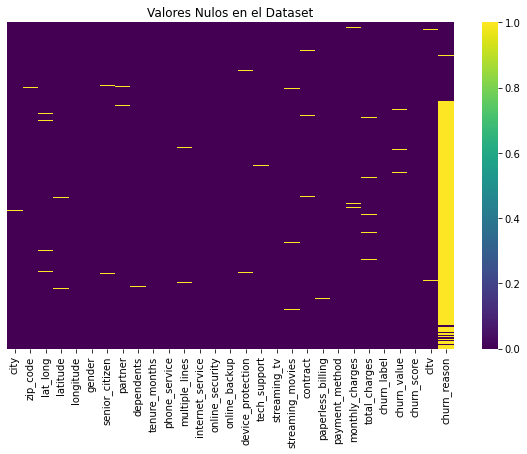

In [12]:
sp.plot_nulos(df)


## 4.1.Geograficos
> a) creamos un subconjunto de datos con las variables relacionadas con aspectos geograficos

In [13]:
df_geo = df[['city','zip_code','lat_long', 'latitude', 'longitude']]
df_geo


,city,zip_code,lat_long,latitude,longitude
0,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783
1,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420
2,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953
3,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709
4,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293
...,...,...,...,...,...
7038,Bakersfield,93304.0,"35.339796, -119.023552",35.339796,-119.023552
7039,Sylmar,91342.0,"34.321621, -118.399841",34.321621,-118.399841
7040,Westminster,92683.0,"33.752591, -117.993661",33.752591,-117.993661
7041,Santa Maria,93454.0,"34.943523, -120.256729",34.943523,-120.256729


> b) analizamos los datos del subconjunto de datos

In [14]:
sp.data_resume(df_geo)

,count,null,null_%,dtype,unique
lat_long,6995,48,0.0068,object,1652
longitude,7021,22,0.0031,float64,1651
city,7026,17,0.0024,object,1129
latitude,7032,11,0.0016,float64,1652
zip_code,7037,6,0.0009,float64,1652


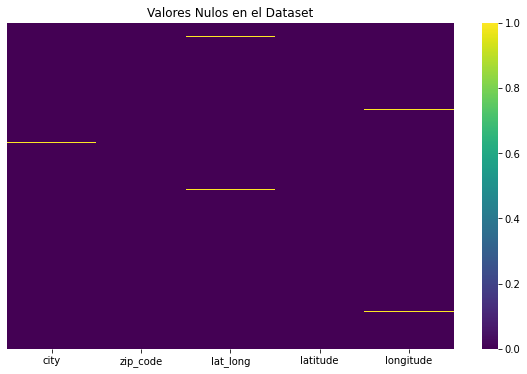

In [15]:
sp.plot_nulos(df_geo)

> c) como tenemos menor presencia de nulos en `zip_code` empezaremos por rellenar los nulos de `zip_code` con la libreria de [geopy](https://geopy.readthedocs.io/en/stable/). 





In [16]:

df_geo[df_geo["zip_code"].isnull()]

,city,zip_code,lat_long,latitude,longitude
83,San Diego,NaN,"32.741499, -117.127409",32.741499,-117.127409
1405,Palo Alto,NaN,"37.416159, -122.131337",37.416159,-122.131337
1430,Larkspur,NaN,"37.937082, -122.532369",37.937082,-122.532369
1897,La Mesa,NaN,"32.759327, -116.99726",32.759327,-116.997260
3856,Hornbrook,NaN,"41.962127, -122.527696",41.962127,-122.527696
5239,Valley Center,NaN,"33.25283, -116.986079",33.252830,-116.986079


In [17]:

# Configurar el geocodificador de Nominatim
user_agent = "zipcode_finder_california" # aqui puedes poner lo que quieras
geolocator = Nominatim(user_agent=user_agent)

# Rate limiter para respetar límites del servicio (1 request por segundo) recuerda que estamos llamando a la API de Nominatim
geocode_with_delay = RateLimiter(geolocator.reverse, min_delay_seconds=1)
# indicamos la latitud y longitud de la fila 83

lat = df_geo.iloc[83]['latitude']
lon = df_geo.iloc[83]['longitude']

print(f"Latitude: {lat}, Longitude: {lon}")

# Hacer la consulta de geocodificación reversa
location = geocode_with_delay((lat, lon), exactly_one=True,timeout=10)
print(location)
  # Extraer información de la dirección
address_components = location.raw.get('address')
print(address_components)

Latitude: 32.741499, Longitude: -117.127409
3426, 31st Street, Burlingame, North Park, San Diego, San Diego County, California, 92104, United States
{'house_number': '3426', 'road': '31st Street', 'neighbourhood': 'Burlingame', 'suburb': 'North Park', 'city': 'San Diego', 'county': 'San Diego County', 'state': 'California', 'ISO3166-2-lvl4': 'US-CA', 'postcode': '92104', 'country': 'United States', 'country_code': 'us'}


In [18]:
# extraemos el zip_code
address_components.get('postcode', None)

'92104'

In [19]:
# comprobamos que la fila 83 tiene el zip_code 92104 coincide con el resto de datos 
df[df["zip_code"]==92104]

,city,zip_code,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
1670,San Diego,92104.0,"32.741499, -117.127409",32.741499,-117.127409,Female,Yes,Yes,No,27.0,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.25,2754.45,Yes,1.0,77.0,4853.0,Attitude of service provider
4138,San Diego,92104.0,"32.741499, -117.127409",32.741499,-117.127409,Female,No,No,No,10.0,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,54.25,583,No,0.0,43.0,2253.0,NaN
5245,San Diego,92104.0,"32.741499, -117.127409",32.741499,-117.127409,Male,No,Yes,No,43.0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),66.25,2907.35,No,0.0,29.0,2168.0,NaN
6521,San Diego,92104.0,"32.741499, -117.127409",32.741499,-117.127409,Male,No,No,No,5.0,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,47.15,223.15,Yes,1.0,82.0,2857.0,Competitor offered higher download speeds


In [20]:
# creamos una función para extraer el zip_code dados la latitud y longitud 
def get_zip_code(lat, lon):
    user_agent = "zipcode_finder_california" # aqui puedes poner lo que quieras
    geolocator = Nominatim(user_agent=user_agent)
    geocode_with_delay = RateLimiter(geolocator.reverse, min_delay_seconds=1)
    location = geocode_with_delay((lat, lon), exactly_one=True)
    try:
        address_components = location.raw['address']
        return address_components.get('postcode', None)
    except:
        return None


In [21]:
# comprobamos 

lat = df_geo.iloc[83]['latitude']
lon = df_geo.iloc[83]['longitude']
get_zip_code(lat, lon)

'92104'

In [22]:
df[df["zip_code"]==94306]

,city,zip_code,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
4522,Palo Alto,94306.0,"37.416159, -122.131337",37.416159,-122.131337,Male,No,Yes,Yes,56.0,No,No phone service,DSL,No,Yes,Yes,No,No,No,One year,Yes,Credit card (automatic),36.10,1971.5,No,0.0,38.0,5092.0,NaN
6576,Palo Alto,94306.0,"37.416159, -122.131337",37.416159,-122.131337,Female,Yes,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.25,308.05,No,0.0,37.0,5251.0,NaN
7011,Palo Alto,94306.0,"37.416159, -122.131337",37.416159,-122.131337,Male,No,No,Yes,27.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.05,552.9,No,0.0,65.0,2400.0,NaN


In [23]:
df_geo[df_geo["zip_code"].isnull()].apply(lambda x: get_zip_code(x["latitude"],x["longitude"]),axis = 1)

83      92104
1405    94306
1430    94939
1897    91941
3856     None
5239    92082
dtype: object

In [24]:
# Get null zip code indices
null_zip_indices = df_geo[df_geo["zip_code"].isnull()].index

# Update zip codes using latitude and longitude
df_geo.loc[null_zip_indices, "zip_code"] = df_geo.loc[null_zip_indices].apply(lambda x: get_zip_code(x["latitude"], x["longitude"]), axis=1)


In [25]:
sp.data_resume(df_geo)

,count,null,null_%,dtype,unique
lat_long,6995,48,0.0068,object,1652
longitude,7021,22,0.0031,float64,1651
city,7026,17,0.0024,object,1129
latitude,7032,11,0.0016,float64,1652
zip_code,7042,1,0.0001,object,1657


⚠️ Cuidado vemos como existe un valor nulo en la columna zip_code. Procedemos a aplicar el cambio y localizar a "ojimetro" el valor.

In [26]:
df_geo[df_geo["zip_code"].isnull()]

,city,zip_code,lat_long,latitude,longitude
3856,Hornbrook,None,"41.962127, -122.527696",41.962127,-122.527696


Vemos como el `zip_code` de `Hornbrook` no existe por lo que tenemos que en un futuro tendremos refactorizar la funcion `get_zip_code`. 

Por ahora nos centraremos en corregir el `zip_code` de `Hornbrook` buscandolo en el conjunto de datos inicial.

In [27]:
df[df["city"]=="Hornbrook"]["zip_code"]

1560    96044.0
2746    96044.0
3856        NaN
4955    96044.0
Name: zip_code, dtype: float64

In [28]:
df_geo.loc[3856,"zip_code"] = 96044
df_geo[df_geo["city"]=="Hornbrook"]["zip_code"]


1560    96044.0
2746    96044.0
3856      96044
4955    96044.0
Name: zip_code, dtype: object

- Aplicamos los cambios con la imputacion de los `zip_code` al conjunto de datos `df` inicial

In [29]:
null_zip_indices = df[df["zip_code"].isnull()].index
df.loc[null_zip_indices, "zip_code"] = df.loc[null_zip_indices].apply(lambda x: get_zip_code(x["latitude"], x["longitude"]), axis=1)
df.loc[3856,"zip_code"] = 96044
df[df["city"]=="Hornbrook"]["zip_code"]

1560    96044.0
2746    96044.0
3856      96044
4955    96044.0
Name: zip_code, dtype: object

In [30]:

sp.data_resume(df)


,count,null,null_%,dtype,unique
churn_reason,1849,5194,0.7375,object,20
dependents,6984,59,0.0084,object,2
contract,6984,59,0.0084,object,3
churn_value,6991,52,0.0074,float64,2
device_protection,6993,50,0.0071,object,3
total_charges,6993,50,0.0071,object,6486
lat_long,6995,48,0.0068,object,1652
multiple_lines,6996,47,0.0067,object,3
tech_support,6996,47,0.0067,object,3
streaming_movies,6997,46,0.0065,object,3


> c) usaremos la columna `zip_code` como punto de referencia para generar un objeto para rellenar los nulos de las otras columnas. 

In [31]:
# obtener los valores unicos de cada fila de df_geo
zip_code_list = list(df_geo["zip_code"].unique())
zip_code_list

[90003.0,
 90005.0,
 90006.0,
 90010.0,
 90015.0,
 90020.0,
 90022.0,
 90024.0,
 90028.0,
 90029.0,
 90032.0,
 90041.0,
 90042.0,
 90056.0,
 90061.0,
 90063.0,
 90065.0,
 90211.0,
 90255.0,
 90262.0,
 90292.0,
 90301.0,
 90303.0,
 90403.0,
 90504.0,
 90602.0,
 90606.0,
 90631.0,
 90660.0,
 90704.0,
 90710.0,
 90712.0,
 90720.0,
 90731.0,
 90745.0,
 91001.0,
 91016.0,
 91024.0,
 91042.0,
 91103.0,
 91107.0,
 91202.0,
 91206.0,
 91304.0,
 91345.0,
 91350.0,
 91381.0,
 91411.0,
 91601.0,
 91605.0,
 91722.0,
 91723.0,
 91731.0,
 91732.0,
 91744.0,
 91746.0,
 91748.0,
 91762.0,
 91764.0,
 91766.0,
 91768.0,
 91770.0,
 91773.0,
 91791.0,
 91803.0,
 91901.0,
 91902.0,
 91905.0,
 91931.0,
 91934.0,
 91948.0,
 92004.0,
 92009.0,
 92014.0,
 92020.0,
 92029.0,
 92057.0,
 92059.0,
 92060.0,
 92061.0,
 92066.0,
 92082.0,
 92103.0,
 '92104',
 92105.0,
 92108.0,
 92116.0,
 92122.0,
 92129.0,
 92154.0,
 92201.0,
 92210.0,
 92211.0,
 92240.0,
 92250.0,
 92257.0,
 92258.0,
 92259.0,
 92273.0,
 92307.0,


In [32]:
df_mapeo =pd.DataFrame(columns=df_geo.columns)

for i in zip_code_list:
    df_aux = df_geo[df_geo["zip_code"] == i]
    df_aux.dropna(inplace=True)
    df_aux = df_aux.head(1)
    df_mapeo = pd.concat([df_mapeo, df_aux], ignore_index=True)

df_mapeo



,city,zip_code,lat_long,latitude,longitude
0,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783
1,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420
2,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953
3,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709
4,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293
...,...,...,...,...,...
1652,Brea,92823.0,"33.924143, -117.79387",33.924143,-117.793870
1653,Palo Alto,94306.0,"37.416159, -122.131337",37.416159,-122.131337
1654,Paicines,95043.0,"36.525703, -120.952122",36.525703,-120.952122
1655,Dunsmuir,96025.0,"41.212695, -122.392067",41.212695,-122.392067


- Comprobamos que el mapeo no tiene valores nulos para asegurar que esten todos los datos para mapear. 

In [33]:
sp.data_resume(df_mapeo)

,count,null,null_%,dtype,unique
city,1657,0,0.0,object,1129
zip_code,1657,0,0.0,object,1657
lat_long,1657,0,0.0,object,1652
latitude,1657,0,0.0,float64,1652
longitude,1657,0,0.0,float64,1651


- Guardamos `df_mapeo` en el directorio */data/output* para futuros usos en formato pkl para mantener la consistencia de los datos.

In [34]:
# guardamos el archivo en formato pkl
df_mapeo.to_pickle("../data/output/df_mapeo.pkl", protocol=4) # protocol 4 sirve para mantener la consistencia de los datos

> d) en un primer momento solucionamos el problema para la columna `latitude`. Mas adelante generalizaremos este proceso para otras columnas.

In [35]:
# generamos un subconjunto de pruebas para evitar problemas con el conjunto inicial

df_nulos_lat =df.copy()

# buscamos los indices de los valores nulos de la columna `latitude`
null_index = df_nulos_lat[df_nulos_lat["latitude"].isnull()].index
null_index

Index([496, 1515, 2836, 3781, 3935, 4261, 5540, 5600, 5688, 5746, 5786], dtype='int64')

In [36]:
# comprobamos el nan de la columna latitude de la fila 496 existe
df_nulos_lat.loc[496]


city                                  Seeley
zip_code                             92273.0
lat_long              32.790282, -115.689559
latitude                                 NaN
longitude                        -115.689559
gender                                Female
senior_citizen                            No
partner                                   No
dependents                                No
tenure_months                           49.0
phone_service                            Yes
multiple_lines                           Yes
internet_service                         DSL
online_security                          Yes
online_backup                            Yes
device_protection                         No
tech_support                              No
streaming_tv                              No
streaming_movies                          No
contract                      Month-to-month
paperless_billing                        Yes
payment_method       Credit card (automatic)
monthly_ch

In [37]:
# localizamos el nulo de la latitud
df_nulos_lat.loc[496,"latitude"]


nan

In [38]:
# localizamos el zip_code en df_nulos_lat
codigo_postal_nulo_latitude = df_nulos_lat.loc[496,"zip_code"]
codigo_postal_nulo_latitude

92273.0

In [39]:
# buscamos la latitud en df_mapeo con el zip_code
df_mapeo[df_mapeo["zip_code"] == codigo_postal_nulo_latitude]["latitude"].iloc[0]

32.790282

In [40]:
# sobreescribimos el nulo de la latitud con el valor encontrado en df_mapeo
df_nulos_lat.loc[496,"latitude"] = df_mapeo[df_mapeo["zip_code"] == codigo_postal_nulo_latitude]["latitude"].iloc[0]

In [41]:
# comprobamos que se ha sobreescrito el nulo de la latitud
df_nulos_lat.loc[496,"latitude"]

32.790282

- Recap y aplicar a toda la columna `latitude`

In [42]:
# Cuales son los `zip_code` que tienen nulos en los indices de `latitude`?
for i in null_index:
        codigo_postal_nulo_latitude = df_nulos_lat.loc[i,"zip_code"]
        print(f"La latitude correspondiente al indice {i}  con codigo postal {codigo_postal_nulo_latitude} es {df_nulos_lat.loc[i,'latitude']}")
        df_nulos_lat.loc[i,"latitude"] = df_mapeo[df_mapeo["zip_code"] == codigo_postal_nulo_latitude]["latitude"].iloc[0]
        print(f"La latitude correspondiente al indice {i}  con codigo postal {codigo_postal_nulo_latitude} es {df_nulos_lat.loc[i,'latitude']}")


La latitude correspondiente al indice 496  con codigo postal 92273.0 es 32.790282
La latitude correspondiente al indice 496  con codigo postal 92273.0 es 32.790282
La latitude correspondiente al indice 1515  con codigo postal 95662.0 es nan
La latitude correspondiente al indice 1515  con codigo postal 95662.0 es 38.689174
La latitude correspondiente al indice 2836  con codigo postal 90201.0 es nan
La latitude correspondiente al indice 2836  con codigo postal 90201.0 es 33.970343
La latitude correspondiente al indice 3781  con codigo postal 95829.0 es nan
La latitude correspondiente al indice 3781  con codigo postal 95829.0 es 38.486502
La latitude correspondiente al indice 3935  con codigo postal 90047.0 es nan
La latitude correspondiente al indice 3935  con codigo postal 90047.0 es 33.958149
La latitude correspondiente al indice 4261  con codigo postal 92653.0 es nan
La latitude correspondiente al indice 4261  con codigo postal 92653.0 es 33.606899
La latitude correspondiente al indic

In [43]:
sp.data_resume(df_nulos_lat)

,count,null,null_%,dtype,unique
churn_reason,1849,5194,0.7375,object,20
dependents,6984,59,0.0084,object,2
contract,6984,59,0.0084,object,3
churn_value,6991,52,0.0074,float64,2
device_protection,6993,50,0.0071,object,3
total_charges,6993,50,0.0071,object,6486
lat_long,6995,48,0.0068,object,1652
multiple_lines,6996,47,0.0067,object,3
tech_support,6996,47,0.0067,object,3
streaming_movies,6997,46,0.0065,object,3


- Recapitulacion para la columna `latitude`
    - buscamos los indices de los valores nulos la columna `latitude`.
    - Recorremos los indices y reemplazamos los valores nulos con el valor correspondiente en la columna `latitude` del dataframe `df_mapeo` usando como llave la columna `zip_code`.
    - Verificamos que los valores nulos hayan sido reemplazados correctamente.

> e) generalizamos a todo el conjunto de datos.

In [44]:
columns_to_check = ['lat_long', 'latitude', 'longitude']

for column in columns_to_check:
    null_index = df[df[column].isnull()].index
    for i in null_index:
        codigo_postal_nulo = df.loc[i,"zip_code"]
        df.loc[i,column] = df_mapeo[df_mapeo["zip_code"] == codigo_postal_nulo][column].iloc[0]


>f) comprobamos que los datos correspondientes a datos geograficos esten como queremos

In [45]:
sp.data_resume(df)

,count,null,null_%,dtype,unique
churn_reason,1849,5194,0.7375,object,20
contract,6984,59,0.0084,object,3
dependents,6984,59,0.0084,object,2
churn_value,6991,52,0.0074,float64,2
device_protection,6993,50,0.0071,object,3
total_charges,6993,50,0.0071,object,6486
tech_support,6996,47,0.0067,object,3
multiple_lines,6996,47,0.0067,object,3
streaming_movies,6997,46,0.0065,object,3
partner,6999,44,0.0062,object,2


## 4.2. churn_value	y churn_score

In [46]:
# seleccionamos solo las columnas "churn_value","churn_label" generando un nuevo conjunto de datos
df_churn = df.copy()
df_churn = df_churn[["churn_value","churn_label"]]
df_churn.head()


,churn_value,churn_label
0,1.0,Yes
1,1.0,Yes
2,1.0,Yes
3,1.0,Yes
4,1.0,Yes


In [47]:
sp.data_resume(df_churn)

,count,null,null_%,dtype,unique
churn_value,6991,52,0.0074,float64,2
churn_label,7028,15,0.0021,object,2


Sabemos que  **Churn Value**: 1 = el cliente dejó la compañía este trimestre. 0 = el cliente permaneció en la compañía. Relacionado directamente con *Churn Label*. Por lo que bastara con rellenar los valores nulos en funcion de la relacion existente entre las dos variables. 


In [48]:

df_churn.value_counts()


churn_value  churn_label
0.0          No             5125
1.0          Yes            1851
Name: count, dtype: int64

### 4.2.1. Operación vectorizada

> a) generamos una serie de booleanos que nos indique los valores nulos en la columna "churn_value" . 

In [49]:
mask_churn_value_null = df_churn['churn_value'].isnull()
mask_churn_value_null

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: churn_value, Length: 7043, dtype: bool

> b) convertimos los valores de la serie a int

Recordemos que si el valor es 0 en la serie aparecera como un `False`

In [50]:
valor = False
int(valor)  

0

In [51]:
# si convertimos valores False a int valores de la serie pasaran a ser  0
mask_churn_value_null.astype(int)


0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: churn_value, Length: 7043, dtype: int64

> c) ya conocemos los registros que tienen valores nulos en la columna churn_value

In [52]:
# valores nulos en la columna churn_value
df_churn.loc[mask_churn_value_null, 'churn_value']

111    NaN
232    NaN
251    NaN
381    NaN
634    NaN
659    NaN
776    NaN
797    NaN
820    NaN
856    NaN
905    NaN
1003   NaN
1026   NaN
1585   NaN
1595   NaN
1767   NaN
1881   NaN
1916   NaN
2171   NaN
2355   NaN
2430   NaN
2492   NaN
2698   NaN
2744   NaN
2781   NaN
2797   NaN
2858   NaN
2903   NaN
3093   NaN
3241   NaN
3344   NaN
3373   NaN
3381   NaN
3493   NaN
3710   NaN
3834   NaN
3849   NaN
3893   NaN
3908   NaN
3938   NaN
3992   NaN
4730   NaN
5182   NaN
5212   NaN
5238   NaN
5393   NaN
5486   NaN
5653   NaN
5719   NaN
5937   NaN
5944   NaN
6062   NaN
Name: churn_value, dtype: float64

> d) localizamos los valores nulos en la columna churn_label 

In [53]:

(df_churn.loc[mask_churn_value_null, 'churn_label'] == 'Yes').astype(int) 


111     1
232     1
251     1
381     1
634     1
659     1
776     1
797     1
820     1
856     1
905     1
1003    1
1026    1
1585    1
1595    1
1767    0
1881    0
1916    0
2171    0
2355    0
2430    0
2492    0
2698    0
2744    0
2781    0
2797    0
2858    0
2903    0
3093    0
3241    0
3344    0
3373    0
3381    0
3493    0
3710    0
3834    0
3849    0
3893    0
3908    0
3938    0
3992    0
4730    0
5182    0
5212    0
5238    0
5393    0
5486    0
5653    0
5719    0
5937    0
5944    0
6062    0
Name: churn_label, dtype: int64

> e) asignamos los valores nulos de churn_value a los correspondientes valores de churn_label

In [54]:
df_churn.loc[mask_churn_value_null, 'churn_value'] = (df_churn.loc[mask_churn_value_null, 'churn_label'] == 'Yes').astype(int)

df_churn

,churn_value,churn_label
0,1.0,Yes
1,1.0,Yes
2,1.0,Yes
3,1.0,Yes
4,1.0,Yes
...,...,...
7038,0.0,No
7039,0.0,No
7040,0.0,No
7041,0.0,No


In [55]:
# comprobamos el cambio 
sp.data_resume(df_churn)

,count,null,null_%,dtype,unique
churn_label,7028,15,0.0021,object,2
churn_value,7043,0,0.0000,float64,2


In [56]:
# Llenar valores nulos en churn_label basado en churn_value
mask_churn_label_null = df_churn['churn_label'].isnull()
df_churn.loc[mask_churn_label_null, 'churn_label'] = (df_churn.loc[mask_churn_label_null, 'churn_value'] == 1).map({True: 'Yes', False: 'No'})


In [57]:
# comprobamos el cambio 
sp.data_resume(df_churn)

,count,null,null_%,dtype,unique
churn_value,7043,0,0.0,float64,2
churn_label,7043,0,0.0,object,2



##### recap


1. df_churn.loc[mask, columna] = valores
   - Selecciona filas donde mask es True
   - Asigna valores solo a esas filas específicas

2. (condición == 'Yes')
   - Crea una Series booleana
   - True donde la condición se cumple, False donde no

3. .astype(int)
   - Convierte True → 1, False → 0
   - Mantiene NaN como NaN si los hubiera

4. Operación vectorizada
   - Se aplica a toda la Series de una vez


### 4.2.2. Usando pandas (fillna() y map())

In [58]:
# seleccionamos solo las columnas numericas generando un nuevo conjunto de datos
df_churn = df.copy()
df_churn = df_churn[["churn_value","churn_label"]]

# Llenar churn_value usando churn_label
df_churn['churn_value'] = df_churn['churn_value'].fillna(df_churn['churn_label'].map({'Yes': 1, 'No': 0}))

# Llenar churn_label usando churn_value

df_churn['churn_label'] = df_churn['churn_label'].fillna(df_churn['churn_value'].map({1: 'Yes', 0: 'No'}))


In [59]:
sp.data_resume(df_churn)

,count,null,null_%,dtype,unique
churn_value,7043,0,0.0,float64,2
churn_label,7043,0,0.0,object,2


In [60]:
sp.data_resume(df)

,count,null,null_%,dtype,unique
churn_reason,1849,5194,0.7375,object,20
contract,6984,59,0.0084,object,3
dependents,6984,59,0.0084,object,2
churn_value,6991,52,0.0074,float64,2
device_protection,6993,50,0.0071,object,3
total_charges,6993,50,0.0071,object,6486
tech_support,6996,47,0.0067,object,3
multiple_lines,6996,47,0.0067,object,3
streaming_movies,6997,46,0.0065,object,3
partner,6999,44,0.0062,object,2


>  generalizamos a todo el conjunto de datos.

In [61]:

# Llenar churn_value usando churn_label
df['churn_value'] = df['churn_value'].fillna(df['churn_label'].map({'Yes': 1, 'No': 0}))

# Llenar churn_label usando churn_value

df['churn_label'] = df['churn_label'].fillna(df['churn_value'].map({1: 'Yes', 0: 'No'}))

sp.data_resume(df)


,count,null,null_%,dtype,unique
churn_reason,1849,5194,0.7375,object,20
contract,6984,59,0.0084,object,3
dependents,6984,59,0.0084,object,2
total_charges,6993,50,0.0071,object,6486
device_protection,6993,50,0.0071,object,3
tech_support,6996,47,0.0067,object,3
multiple_lines,6996,47,0.0067,object,3
streaming_movies,6997,46,0.0065,object,3
partner,6999,44,0.0062,object,2
senior_citizen,7006,37,0.0053,object,2


## 4.3.Numericas




> #### Guía rápida – Evaluación del Sesgo (asimetría)


| Relación                                                   | Nivel de sesgo            | Interpretación práctica                                                          | Estadístico más robusto           |
| ---------------------------------------------------------- | ------------------------- | -------------------------------------------------------------------------------- | --------------------------------- |
| $\lvert\text{Media} - \text{Mediana}\rvert$  < 0.1 × Desv.Std                         | **Simetría**              | La media y la mediana son muy similares. Distribución aproximadamente simétrica. | **Media** (representativa)        |
| Media > Mediana y diferencia moderada (0.1–0.3 × Desv.Std) | **Sesgo positivo leve**   | Cola hacia la derecha. Algunos valores grandes elevan la media.                  | **Mediana** más robusta           |
| Media > Mediana y diferencia alta (> 0.3 × Desv.Std)       | **Sesgo positivo fuerte** | Cola derecha muy marcada. La media está inflada por outliers altos.              | **Mediana** claramente preferible |
| Media < Mediana y diferencia moderada (0.1–0.3 × Desv.Std) | **Sesgo negativo leve**   | Cola hacia la izquierda. Algunos valores pequeños reducen la media.              | **Mediana** más robusta           |
| Media < Mediana y diferencia alta (> 0.3 × Desv.Std)       | **Sesgo negativo fuerte** | Cola izquierda muy marcada. La media está arrastrada por valores bajos extremos. | **Mediana** claramente preferible |






>#### Guía rápida – Evaluación del Coeficiente de Variación (CV)

| Rango de CV   | Nivel de variabilidad | Interpretación práctica                                          | Ejemplo en un dataset de clientes                                                 |
| ------------- | --------------------- | ---------------------------------------------------------------- | --------------------------------------------------------------------------------- |
| **< 10%**     | Muy baja              | Los datos son muy homogéneos respecto a la media.                | Todos los clientes pagan casi lo mismo de *Monthly Charges*.                      |
| **10% – 20%** | Baja                  | La media representa bastante bien a los datos.                   | Permanencia de clientes con poca dispersión (ej. casi todos entre 20–24 meses).   |
| **20% – 40%** | Moderada              | Hay cierta variabilidad, la media sigue siendo representativa.   | Variabilidad en *Total Charges* (clientes con pagos diferentes según uso/tenure). |
| **40% – 60%** | Alta                  | La media empieza a ser poco fiable como resumen.                 | CLTV con diferencias notables entre clientes.                                     |
| **> 60%**     | Muy alta              | Los datos son muy dispersos, la media casi no es representativa. | *Tenure Months*: algunos clientes muy nuevos y otros con muchos años.             |



> #### Evaluación combinada: CV + Sesgo

La robustez de un estadístico central se entiende mejor al **combinar ambas métricas**:

| Sesgo relativo             | CV bajo (<20%)                             | CV moderado (20–40%)            | CV alto (>40%)                                                             |
| -------------------------- | ------------------------------------------ | ------------------------------- | -------------------------------------------------------------------------- |
| **≈ 0 (Simetría)**         | Media robusta                              | Media válida, añadir dispersión | Media poco representativa → reportar también Mediana                       |
| **Sesgo leve (0.1–0.3 σ)** | Mediana más robusta aunque Media aceptable | Mediana preferible              | Mediana claramente preferible; considerar transformación                   |
| **Sesgo fuerte (>0.3 σ)**  | Mediana preferible                         | Mediana claramente más robusta  | Mediana obligatoria; evaluar transformación (log, winsorización, recortes) |


### 4.3.1. Usando analisis descriptivo 


In [64]:
# seleccionamos la columna s numericas
df_numericas = df.copy()
df_numericas = df_numericas.select_dtypes(include=['number'])
df_numericas.drop(columns=['latitude','longitude','churn_value'], inplace=True)

sp.data_resume(df_numericas)


,count,null,null_%,dtype,unique
monthly_charges,7012,31,0.0044,float64,1581
cltv,7033,10,0.0014,float64,3436
churn_score,7038,5,0.0007,float64,85
tenure_months,7042,1,0.0001,float64,73


> imputación de valores faltantes en la columna`monthly_charges`



In [65]:
df_numericas["monthly_charges"].describe()

count    7012.000000
mean       64.787008
std        30.094167
min        18.250000
25%        35.550000
50%        70.350000
75%        89.862500
max       118.750000
Name: monthly_charges, dtype: float64

In [66]:
std_ = df_numericas["monthly_charges"].std()
mean_ = df_numericas["monthly_charges"].mean()
median_ = df_numericas["monthly_charges"].median()
diff =abs(mean_-median_)
cv = std_/mean_
print(f"el sesgo relativo es de {diff:.2f} al encontrarse {diff/std_:.2f} en el rango de 10% y el 30% de la desviación estándar,  sesgo positivo leve/moderado")
print(f"el coeficiente de variación es de {cv:.2f}. Al encotnrarse entre 40–60% tenemos alta variabilidad relativa. Lo que significa que los datos están muy dispersos respecto a la media, por lo que la media pierde representatividad como centro ")


el sesgo relativo es de 5.56 al encontrarse 0.18 en el rango de 10% y el 30% de la desviación estándar,  sesgo positivo leve/moderado
el coeficiente de variación es de 0.46. Al encotnrarse entre 40–60% tenemos alta variabilidad relativa. Lo que significa que los datos están muy dispersos respecto a la media, por lo que la media pierde representatividad como centro 


- **Conclusión**: La distribución presenta un sesgo positivo leve/moderado y una alta variabilidad relativa (CV = 46%). Por ello, la Mediana es el estadístico más robusto para describir la tendencia central, mientras que la Media resulta poco representativa de los datos.

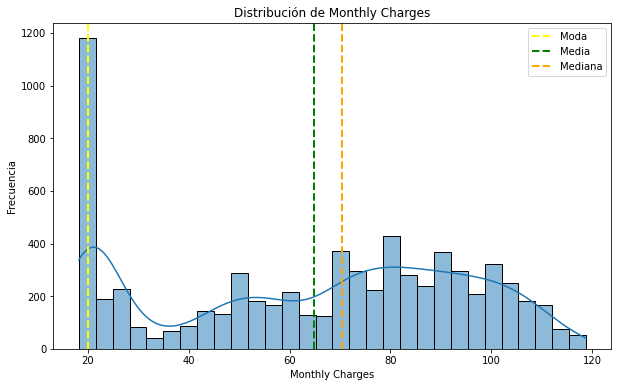

In [67]:
# generamos un grafico para ver las frecuencias , la mejor opcion para ello es usar un hitograma con la curva de densidad
plt.figure(figsize=(10, 6))
sns.histplot(df_numericas["monthly_charges"], kde=True, bins=30)
plt.title('Distribución de Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frecuencia')
plt.axvline(df_numericas["monthly_charges"].mode()[0], color='yellow', linestyle='dashed', linewidth=2, label='Moda')
plt.axvline(df_numericas["monthly_charges"].mean(), color='green', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(df_numericas["monthly_charges"].median(), color='orange', linestyle='dashed', linewidth=2, label='Mediana')


plt.legend()
plt.show()

**¿Por qué NO usar la media en este caso?**

- La diferencia de 5.5 puntos entre media y mediana sugiere sesgo
- La media (64.79) estaría introduciendo un bias hacia valores más bajos
- Los outliers afectan más a la media que a la mediana
- Coeficiente de variación: 46,33%  indica alta dispersión en relación con la media.

**¿Por qué la mediana es la más robusta?**

- Diferencia media-mediana significativa: 64.79 vs 70.35 (diferencia de ~5.5) indica distribución sesgada
- Resistente a outliers: La mediana no se ve afectada por valores extremos
- Representa el centro real: El 50% de los datos está por encima y 50% por debajo



In [68]:
df_numericas["monthly_charges"] = df_numericas["monthly_charges"].replace(np.nan,df_numericas["monthly_charges"].median())

sp.data_resume(df_numericas)

,count,null,null_%,dtype,unique
cltv,7033,10,0.0014,float64,3436
churn_score,7038,5,0.0007,float64,85
tenure_months,7042,1,0.0001,float64,73
monthly_charges,7043,0,0.0000,float64,1581


In [69]:
df["monthly_charges"] = df["monthly_charges"].fillna(df["monthly_charges"].median())


In [70]:
sp.data_resume(df)

,count,null,null_%,dtype,unique
churn_reason,1849,5194,0.7375,object,20
contract,6984,59,0.0084,object,3
dependents,6984,59,0.0084,object,2
total_charges,6993,50,0.0071,object,6486
device_protection,6993,50,0.0071,object,3
multiple_lines,6996,47,0.0067,object,3
tech_support,6996,47,0.0067,object,3
streaming_movies,6997,46,0.0065,object,3
partner,6999,44,0.0062,object,2
senior_citizen,7006,37,0.0053,object,2


> imputación de valores faltantes en la columna `churn_score`

In [71]:
sp.data_resume(df_numericas)


,count,null,null_%,dtype,unique
cltv,7033,10,0.0014,float64,3436
churn_score,7038,5,0.0007,float64,85
tenure_months,7042,1,0.0001,float64,73
monthly_charges,7043,0,0.0000,float64,1581


In [72]:
df_numericas["churn_score"].describe()

count    7038.000000
mean       58.695084
std        21.520884
min         5.000000
25%        40.000000
50%        61.000000
75%        75.000000
max       100.000000
Name: churn_score, dtype: float64

- `.describe()` esta muy bien pero en ocasiones como antes nos faltaba la moda. Pasamos a crear una función para calcularla y añadirla a nuestro resumen estadistico.

In [73]:
def calculate_basic_stats(df, column):
    """
    Calcula las estadísticas básicas para una columna numérica de un DataFrame.

    Parámetros:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    column (str): El nombre de la columna numérica para la cual se calcularán las estadísticas.

    Retorna:
    pd.Series: Un Series con las estadísticas básicas (media, mediana, desviación estándar, mínimo, máximo, moda, coeficiente de variación).
    """

    # Verificar que la columna existe
    if column not in df.columns:
        raise ValueError(f"La columna '{column}' no existe en el DataFrame")
    
    # Eliminar valores nulos para los cálculos
    data = df[column].dropna()
    
    if len(data) == 0:
        raise ValueError(f"La columna '{column}' no tiene valores válidos")
    
        # Calcular estadísticos básicos
    mean_ = data.mean()
    median_ = data.median()
    mode_ = data.mode()[0] if len(data.mode()) > 0 else np.nan
    q1_ = data.quantile(0.25)
    q3_ = data.quantile(0.75)
    std_ = data.std()
    min_ = data.min()
    max_ = data.max()
    count_ = len(data)
    iqr_ = q3_ - q1_

    stats = pd.Series({
        "media": mean_,
        "mediana": median_,
        "moda": mode_,
        "q1": q1_,
        "q3": q3_,
        "std": std_,
        "min": min_,
        "max": max_,
        "count": count_,
        "iqr": iqr_
    })

    return stats
    


In [74]:
estadisticas = calculate_basic_stats(df_numericas, "churn_score")
estadisticas

media        58.695084
mediana      61.000000
moda         80.000000
q1           40.000000
q3           75.000000
std          21.520884
min           5.000000
max         100.000000
count      7038.000000
iqr          35.000000
dtype: float64


- Evaluacion del **sesgo**

    - Diferencia entre Media y Mediana $$|\text{Media} - \text{Mediana}| = |58.70 - 61.00| = 2.30$$

        En relación con la desviación estándar:$$\frac{2.30}{21.52} \approx 0.107  \Rightarrow  10.7 \sigma$$

        Esto cae justo en el **umbral inferior del rango 0.1–0.3 σ**, lo que indica un **sesgo leve**.

    - Dirección del sesgo

        - Media (58.7) **<** Mediana (61.0).
        - Eso implica que la distribución está **sesgada a la izquierda** (sesgo negativo).
        - En un sesgo negativo, la cola larga está hacia los **valores bajos**.
        - Además, tenemos que Moda = 80, que es bastante **mayor** que la media y la mediana. Confirmando asi el sesgo negativo.
        $$\text{Media (58.7)} < \text{Mediana (61)} < \text{Moda (80)}$$
            
    - Conclusión: 
    
        La distribución presenta un sesgo negativo leve (la media es 10.7% inferior a la mediana en relación con la desviación estándar). En consecuencia, la **Mediana describe mejor la tendencia central** que la Media, aunque la diferencia entre ambas es pequeña y la Media aún puede considerarse aceptable en un contexto exploratorio.


In [75]:

df_numericas["churn_score"]

0       86.0
1       67.0
2       86.0
3       84.0
4       89.0
        ... 
7038    46.0
7039    75.0
7040    67.0
7041    66.0
7042    29.0
Name: churn_score, Length: 7043, dtype: float64

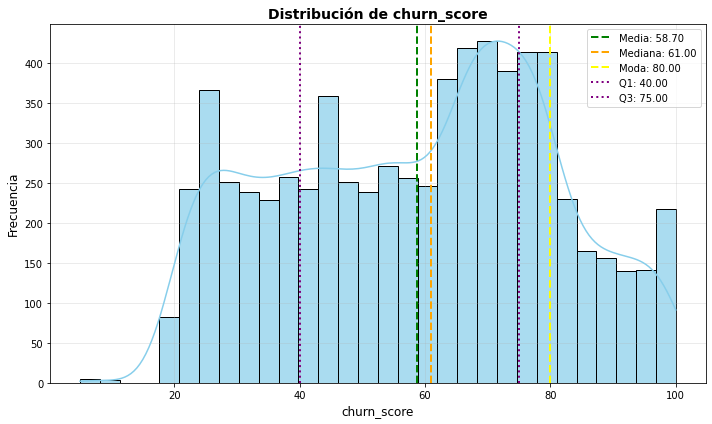

In [77]:

df_numericas = df.copy()
df_numericas = df_numericas.select_dtypes(include=['number'])
df_numericas.drop(columns=['latitude','longitude','churn_value'], inplace=True)


# Crear una serie sin NAs
churn_score_clean = df_numericas["churn_score"].dropna()
# Crear la figura
plt.figure(figsize=(10, 6))

# Crear el histograma con KDE
sns.histplot(churn_score_clean, kde=True, bins=30, alpha=0.7, color='skyblue')
# Añadir líneas verticales para estadísticos principales
plt.axvline(estadisticas['media'], color='green', linestyle='dashed', 
            linewidth=2, label=f'Media: {estadisticas["media"]:.2f}')

plt.axvline(estadisticas['mediana'], color='orange', linestyle='dashed', 
            linewidth=2, label=f'Mediana: {estadisticas["mediana"]:.2f}')


show_mode=True
# Añadir moda si se solicita y existe
if show_mode and not pd.isna(estadisticas['moda']):
    plt.axvline(estadisticas['moda'], color='yellow', linestyle='dashed', 
                linewidth=2, label=f'Moda: {estadisticas["moda"]:.2f}')


show_quartiles=True
# Añadir cuartiles si se solicita
if show_quartiles:
    plt.axvline(estadisticas['q1'], color='purple', linestyle='dotted', 
                linewidth=2, label=f'Q1: {estadisticas["q1"]:.2f}')
    plt.axvline(estadisticas['q3'], color='purple', linestyle='dotted', 
                linewidth=2, label=f'Q3: {estadisticas["q3"]:.2f}')

# Configurar título y etiquetas
plt.title(f'Distribución de {"churn_score"}', fontsize=14, fontweight='bold')
plt.xlabel("churn_score", fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Añadir leyenda
plt.legend(loc='best')

# Añadir grid para mejor legibilidad
plt.grid(True, alpha=0.3)

# Ajustar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [78]:
estadisticas

cv = (estadisticas["std"] / estadisticas["media"]) * 100.0
cv


36.66556492059435

- Evaluación del Coeficiente de variación

    - Coeficiente de variación: $$CV = \frac{\text{Desviación estándar}}{\text{Media}} = \frac{\text{21.52}}{\text{58.70}} = \approx 0.37$$
    - Interpretación: El coeficiente de variación es del 37%, lo que indica una **moderada dispersión o variabilidad** en relación con la media. 


- Conclusión:
    - Sesgo negativo leve (Media < Mediana). La Mediana es más robusta porque la distribución no es perfectamente simétrica.

    - CV moderado (36.7%). El CV no es tan alto como para descartar la Media, pero sí suficiente para recomendar tener en cuenta también la Mediana en los análisis. 

La variable presenta un sesgo negativo leve y una variabilidad`churn_score` relativa moderada (CV ≈ 36.7%). La **Mediana** es el estadístico central más robusto, aunque la Media todavía puede considerarse razonablemente representativa.

In [79]:
# reemplazamos los valores nulos de la columna churn_score con la mediana
df_numericas["churn_score"].fillna(df_numericas["churn_score"].median(), inplace=True)


In [80]:
sp.data_resume(df_numericas)

,count,null,null_%,dtype,unique
cltv,7033,10,0.0014,float64,3436
tenure_months,7042,1,0.0001,float64,73
monthly_charges,7043,0,0.0000,float64,1581
churn_score,7043,0,0.0000,float64,85


> imputación de valores faltantes en la columna `tenure_months`

In [83]:

def plot_distribution_with_stats(df, column, figsize=(10, 6), bins=30, kde=True, 
                                 show_mode=True, show_quartiles=True):
    """
    Crea un histograma con estadísticos descriptivos marcados con líneas verticales.
    
    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame que contiene los datos
    column : str
        Nombre de la columna a graficar
    figsize : tuple, default (10, 6)
        Tamaño de la figura (ancho, alto)
    bins : int, default 30
        Número de bins para el histograma
    kde : bool, default True
        Si mostrar la curva de densidad kernel
    show_mode : bool, default True
        Si mostrar la línea de la moda
    show_quartiles : bool, default True
        Si mostrar las líneas Q1 y Q3
    
    Returns:
    --------
    dict : Diccionario con todos los estadísticos calculados
    """
    
    # Verificar que la columna existe
    if column not in df.columns:
        raise ValueError(f"La columna '{column}' no existe en el DataFrame")
    
    # Eliminar valores nulos para los cálculos
    data = df[column].dropna()
    
    if len(data) == 0:
        raise ValueError(f"La columna '{column}' no tiene valores válidos")
    
    # Calcular estadísticos
    stats = {
        'mean': data.mean(),
        'median': data.median(),
        'mode': data.mode()[0] if len(data.mode()) > 0 else np.nan,
        'q1': data.quantile(0.25),
        'q3': data.quantile(0.75),
        'std': np.std(data), # desviación estándar de numpy
        'min': data.min(),
        'max': data.max(),
        'count': len(data)
    }
    
    # Crear la figura
    plt.figure(figsize=figsize)
    
    # Crear el histograma con KDE
    sns.histplot(data, kde=kde, bins=bins, alpha=0.7, color='skyblue')
    
    # Añadir líneas verticales para estadísticos principales
    plt.axvline(stats['mean'], color='green', linestyle='dashed', 
                linewidth=2, label=f'Media: {stats["mean"]:.2f}')
    
    plt.axvline(stats['median'], color='orange', linestyle='dashed', 
                linewidth=2, label=f'Mediana: {stats["median"]:.2f}')
    
    # Añadir moda si se solicita y existe
    if show_mode and not pd.isna(stats['mode']):
        plt.axvline(stats['mode'], color='yellow', linestyle='dashed', 
                    linewidth=2, label=f'Moda: {stats["mode"]:.2f}')
    
    # Añadir cuartiles si se solicita
    if show_quartiles:
        plt.axvline(stats['q1'], color='purple', linestyle='dotted', 
                    linewidth=2, label=f'Q1: {stats["q1"]:.2f}')
        plt.axvline(stats['q3'], color='purple', linestyle='dotted', 
                    linewidth=2, label=f'Q3: {stats["q3"]:.2f}')
    
    # Configurar título y etiquetas
    plt.title(f'Distribución de {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    
    # Añadir leyenda
    plt.legend(loc='best')
    
    # Añadir grid para mejor legibilidad
    plt.grid(True, alpha=0.3)
    
    # Ajustar layout
    plt.tight_layout()
    
    # Mostrar gráfico
    plt.show()
    
    # Imprimir resumen estadístico
    print(f"\nRESUMEN ESTADÍSTICO DE '{column}':")
    print("=" * 40)
    print(f"Observaciones: {stats['count']:,}")
    print(f"Media:         {stats['mean']:.2f}")
    print(f"Mediana:       {stats['median']:.2f}")
    if not pd.isna(stats['mode']):
        print(f"Moda:          {stats['mode']:.2f}")
    print(f"Desv. Std:     {stats['std']:.2f}")
    print(f"Q1:            {stats['q1']:.2f}")
    print(f"Q3:            {stats['q3']:.2f}")
    print(f"Rango IQR:     {stats['q3'] - stats['q1']:.2f}")
    print(f"Mínimo:        {stats['min']:.2f}")
    print(f"Máximo:        {stats['max']:.2f}")
    
    # Análisis de la distribución
    print(f"\nANÁLISIS DE LA DISTRIBUCIÓN:")
    print("-" * 30)
    diff_mean_median = abs(stats['mean'] - stats['median'])
    print(f"Diferencia |Media - Mediana|: {diff_mean_median:.2f}")
    
    if diff_mean_median < stats['std'] * 0.1:
        print("→ Distribución SIMÉTRICA")
        print("→ Recomendación: MEDIA para imputación")
    elif stats['mean'] > stats['median']:
        print("→ Distribución con SESGO POSITIVO (cola derecha)")
        print("→ Recomendación: MEDIANA para imputación")
    else:
        print("→ Distribución con SESGO NEGATIVO (cola izquierda)")
        print("→ Recomendación: MEDIANA para imputación")
    
    return stats

In [84]:
sp.data_resume(df_numericas)


,count,null,null_%,dtype,unique
cltv,7033,10,0.0014,float64,3436
tenure_months,7042,1,0.0001,float64,73
monthly_charges,7043,0,0.0000,float64,1581
churn_score,7043,0,0.0000,float64,85


In [86]:
def categorize_cv(x):
    if not np.isfinite(x):
        return "no aplicable"
    if x < 10:
        return "muy baja"
    elif x < 20:
        return "baja"
    elif x < 40:
        return "moderada"
    elif x < 60:
        return "alta"
    else:
        return "muy alta"

def plot_distribution_with_stats(df, column, figsize=(10, 6), bins=30, kde=True, 
                                 show_mode=True, show_quartiles=True):
    """
    Crea un histograma con estadísticos descriptivos marcados con líneas verticales
    e incluye la evaluación del Coeficiente de Variación (CV).
    
    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame que contiene los datos
    column : str
        Nombre de la columna a graficar
    figsize : tuple, default (10, 6)
        Tamaño de la figura (ancho, alto)
    bins : int, default 30
        Número de bins para el histograma
    kde : bool, default True
        Si mostrar la curva de densidad kernel
    show_mode : bool, default True
        Si mostrar la línea de la moda
    show_quartiles : bool, default True
        Si mostrar las líneas Q1 y Q3
    
    Returns:
    --------
    dict : Diccionario con todos los estadísticos calculados, incluyendo:
           'cv' (en %), 'cv_valid' (bool) y 'cv_category'
    """
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Verificar que la columna existe
    if column not in df.columns:
        raise ValueError(f"La columna '{column}' no existe en el DataFrame")
    
    # Eliminar valores nulos para los cálculos
    data = df[column].dropna()
    
    if len(data) == 0:
        raise ValueError(f"La columna '{column}' no tiene valores válidos")
    
    # Calcular estadísticos básicos
    mean_ = data.mean()
    median_ = data.median()
    mode_ = data.mode()[0] if len(data.mode()) > 0 else np.nan
    q1_ = data.quantile(0.25)
    q3_ = data.quantile(0.75)
    std_ = data.std()
    min_ = data.min()
    max_ = data.max()
    count_ = len(data)
    iqr_ = q3_ - q1_

    # --- Coeficiente de Variación (CV) ---
    # Validez: CV es apropiado para variables en escala de razón y con media > 0
    # También evitamos inestabilidad cuando la media está demasiado cerca de 0
    eps = 1e-12
    cv_valid = bool(mean_ > 0 and abs(mean_) > eps and np.isfinite(std_))
    if cv_valid:
        cv = (std_ / mean_) * 100.0
    else:
        cv = np.nan



    cv_category = categorize_cv(cv)

    # Consolidar estadísticos
    stats = {
        'mean': mean_,
        'median': median_,
        'mode': mode_,
        'q1': q1_,
        'q3': q3_,
        'std': std_,
        'min': min_,
        'max': max_,
        'count': count_,
        'iqr': iqr_,
        'cv': cv,                 # porcentaje
        'cv_valid': cv_valid,     # bool
        'cv_category': cv_category
    }
    
    # Crear la figura
    plt.figure(figsize=figsize)
    
    # Crear el histograma con KDE
    sns.histplot(data, kde=kde, bins=bins, alpha=0.7, color='skyblue')
    
    # Añadir líneas verticales para estadísticos principales
    plt.axvline(stats['mean'], color='green', linestyle='dashed', 
                linewidth=2, label=f'Media: {stats["mean"]:.2f}')
    
    plt.axvline(stats['median'], color='orange', linestyle='dashed', 
                linewidth=2, label=f'Mediana: {stats["median"]:.2f}')
    
    # Añadir moda si se solicita y existe
    if show_mode and not pd.isna(stats['mode']):
        plt.axvline(stats['mode'], color='yellow', linestyle='dashed', 
                    linewidth=2, label=f'Moda: {stats["mode"]:.2f}')
    
    # Añadir cuartiles si se solicita
    if show_quartiles:
        plt.axvline(stats['q1'], color='purple', linestyle='dotted', 
                    linewidth=2, label=f'Q1: {stats["q1"]:.2f}')
        plt.axvline(stats['q3'], color='purple', linestyle='dotted', 
                    linewidth=2, label=f'Q3: {stats["q3"]:.2f}')
    
    # Configurar título y etiquetas
    plt.title(f'Distribución de {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    
    # Añadir leyenda
    plt.legend(loc='best')
    
    # Añadir grid para mejor legibilidad
    plt.grid(True, alpha=0.3)

    # --- Anotación del CV en el gráfico ---
    if stats['cv_valid']:
        cv_text = f"CV: {stats['cv']:.2f}% ({stats['cv_category']})"
    else:
        cv_text = "CV: no aplicable (media ≤ 0 o ~0)"
    plt.gcf().text(0.99, 0.02, cv_text, ha='right', va='bottom',
                   fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.7, edgecolor='gray'))

    # Ajustar layout
    plt.tight_layout()
    
    # Mostrar gráfico
    plt.show()
    
    # Imprimir resumen estadístico
    print(f"\nRESUMEN ESTADÍSTICO DE '{column}':")
    print("=" * 40)
    print(f"Observaciones: {stats['count']:,}")
    print(f"Media:         {stats['mean']:.2f}")
    print(f"Mediana:       {stats['median']:.2f}")
    if not pd.isna(stats['mode']):
        print(f"Moda:          {stats['mode']:.2f}")
    print(f"Desv. Std:     {stats['std']:.2f}")
    print(f"Q1:            {stats['q1']:.2f}")
    print(f"Q3:            {stats['q3']:.2f}")
    print(f"Rango IQR:     {stats['iqr']:.2f}")
    print(f"Mínimo:        {stats['min']:.2f}")
    print(f"Máximo:        {stats['max']:.2f}")

    # CV en el resumen
    if stats['cv_valid']:
        print(f"Coef. Variación: {stats['cv']:.2f}% ({stats['cv_category']})")
    else:
        print("Coef. Variación: no aplicable (requiere media > 0 y alejada de 0)")

    # Análisis de la distribución
    print(f"\nANÁLISIS DE LA DISTRIBUCIÓN:")
    print("-" * 30)
    diff_mean_median = abs(stats['mean'] - stats['median'])
    print(f"Diferencia |Media - Mediana|: {diff_mean_median:.2f}")
    
    if diff_mean_median < stats['std'] * 0.1:
        print("→ Distribución SIMÉTRICA")
        print("→ Recomendación: MEDIA para imputación")
    elif stats['mean'] > stats['median']:
        print("→ Distribución con SESGO POSITIVO (cola derecha)")
        print("→ Recomendación: MEDIANA para imputación")
    else:
        print("→ Distribución con SESGO NEGATIVO (cola izquierda)")
        print("→ Recomendación: MEDIANA para imputación")
    
    # Nota interpretativa del CV
    if stats['cv_valid']:
        if stats['cv'] < 10:
            print("→ CV muy bajo: datos muy homogéneos respecto a la media.")
        elif stats['cv'] < 20:
            print("→ CV bajo: la media es representativa.")
        elif stats['cv'] < 40:
            print("→ CV moderado: variabilidad apreciable, la media aún es útil.")
        elif stats['cv'] < 60:
            print("→ CV alto: cautela al usar la media como resumen.")
        else:
            print("→ CV muy alto: la media es poco representativa; considerar transformaciones (p.ej., log).")
    else:
        print("→ CV no aplicable: variable no apta (media ≤ 0 o muy cercana a 0) para interpretar variabilidad relativa.")

    return stats


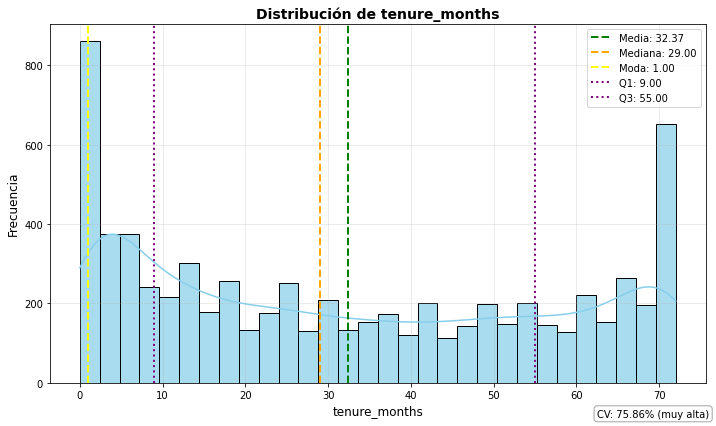


RESUMEN ESTADÍSTICO DE 'tenure_months':
Observaciones: 7,042
Media:         32.37
Mediana:       29.00
Moda:          1.00
Desv. Std:     24.56
Q1:            9.00
Q3:            55.00
Rango IQR:     46.00
Mínimo:        0.00
Máximo:        72.00
Coef. Variación: 75.86% (muy alta)

ANÁLISIS DE LA DISTRIBUCIÓN:
------------------------------
Diferencia |Media - Mediana|: 3.37
→ Distribución con SESGO POSITIVO (cola derecha)
→ Recomendación: MEDIANA para imputación
→ CV muy alto: la media es poco representativa; considerar transformaciones (p.ej., log).


{'mean': 32.37446748082931,
 'median': 29.0,
 'mode': 1.0,
 'q1': 9.0,
 'q3': 55.0,
 'std': 24.559645488384668,
 'min': 0.0,
 'max': 72.0,
 'count': 7042,
 'iqr': 46.0,
 'cv': 75.86115664428388,
 'cv_valid': True,
 'cv_category': 'muy alta'}

In [87]:
plot_distribution_with_stats(df_numericas, "tenure_months")

. Usamos la mediana para imputar los valores faltantes en la columna `tenure_months`

In [88]:


df_numericas["tenure_months"].fillna(df_numericas["tenure_months"].median(), inplace=True)


In [89]:
sp.data_resume(df_numericas)

,count,null,null_%,dtype,unique
cltv,7033,10,0.0014,float64,3436
tenure_months,7043,0,0.0000,float64,73
monthly_charges,7043,0,0.0000,float64,1581
churn_score,7043,0,0.0000,float64,85


⚠️ Dejaremos la columna  `cltv` con valores nulos para realizar un ejercicvio de regresion lineal. 



### 4.3.2. Usando KNNImputer


⚠️**Solo lo podremos usar para variables numericas o de formato fecha.** 


![imagen](https://towardsdatascience.com/wp-content/uploads/2022/05/1X87BpgaCcr4IYZqP8lxH0Q.png)


KNN funciona de la misma manera. Según el valor de k, el algoritmo clasifica las nuevas muestras por el voto mayoritario de los k vecinos más cercanos en la clasificación. Para la regresión, que predice el valor numérico real de una nueva muestra, el algoritmo toma la media de los k vecinos más cercanos. 

KNNImputer es una versión ligeramente modificada del algoritmo en la que trata de predecir el valor numérico nulo promediando las distancias entre sus k vecinos más cercanos.


Basicamente lo que hace este método es :

- Medir la distancai entre cada punto y las N-muestras más cercanas (especificado como el parémtro `n_neighbours`)


- Basándose en su(s) vecino(s) más cercano(s), tomará el valor medio de los N vecinos no nulos más cercanos al valor que falta.









> a) creamos un subconjunto de datos con las variables relacionadas con aspectos numericos

In [90]:
# seleccionamos la columna s numericas
df_numericas = df.copy()
df_numericas = df_numericas.select_dtypes(include=['number'])
df_numericas.drop(columns=['cltv','latitude','longitude','churn_value'], inplace=True)

sp.data_resume(df_numericas)

,count,null,null_%,dtype,unique
churn_score,7038,5,0.0007,float64,85
tenure_months,7042,1,0.0001,float64,73
monthly_charges,7043,0,0.0000,float64,1581


> c) configurar el imputador



In [91]:

imputerKNN = KNNImputer(n_neighbors=5)


> d ) Entrenar el imputador (aprender los patrones)


In [92]:
imputerKNN.fit(df_numericas)

KNNImputer()

> e) aplicar la imputación

In [93]:
# aplicamos 
numericas_knn= imputerKNN.transform(df_numericas) # transform 

> f) reconvertimos a dataframe

In [94]:
df_knn_imputer = pd.DataFrame(numericas_knn, columns = df_numericas.columns)
df_knn_imputer.head()

,tenure_months,monthly_charges,churn_score
0,2.0,53.85,86.0
1,2.0,70.70,67.0
2,8.0,99.65,86.0
3,28.0,104.80,84.0
4,49.0,103.70,89.0


> g) guardamos los nombres de las columnas que fueron imputadas

In [95]:
columnas_knn = df_knn_imputer.columns
columnas_knn

Index(['tenure_months', 'monthly_charges', 'churn_score'], dtype='object')

> h) eliminar las columnas originales

In [96]:
df.drop(columnas_knn, axis=1, inplace=True)  


> 

> i) insertar las columnas imputadas en el DataFrame principal

In [97]:
df[columnas_knn] = df_knn_imputer[columnas_knn]
df.head()

,city,zip_code,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,total_charges,churn_label,churn_value,cltv,churn_reason,tenure_months,monthly_charges,churn_score
0,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes,1.0,3239.0,Competitor made better offer,2.0,53.85,86.0
1,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes,1.0,2701.0,Moved,2.0,70.70,67.0
2,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,820.5,Yes,1.0,5372.0,Moved,8.0,99.65,86.0
3,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3046.05,Yes,1.0,5003.0,Moved,28.0,104.80,84.0
4,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,NaN,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),5036.3,Yes,1.0,5340.0,Competitor had better devices,49.0,103.70,89.0


In [98]:
sp.data_resume(df.select_dtypes(include=['number']))


,count,null,null_%,dtype,unique
cltv,7033,10,0.0014,float64,3436
latitude,7043,0,0.0000,float64,1652
longitude,7043,0,0.0000,float64,1651
churn_value,7043,0,0.0000,float64,2
tenure_months,7043,0,0.0000,float64,73
monthly_charges,7043,0,0.0000,float64,1581
churn_score,7043,0,0.0000,float64,90



## 4.4.Categoricas

In [147]:
# seleccionamos la columnaas categoricas
df_cate = df.copy()
df_cate = df_cate.select_dtypes(include=['object'])
sp.data_resume(df_cate)


,count,null,null_%,dtype,unique
churn_reason,1849,5194,0.7375,object,20
contract,6984,59,0.0084,object,3
dependents,6984,59,0.0084,object,2
device_protection,6993,50,0.0071,object,3
total_charges,6993,50,0.0071,object,6486
multiple_lines,6996,47,0.0067,object,3
tech_support,6996,47,0.0067,object,3
streaming_movies,6997,46,0.0065,object,3
partner,6999,44,0.0062,object,2
senior_citizen,7006,37,0.0053,object,2


## 4.4.1.Columna `gender`


In [148]:
df_cate["gender"].describe()

count     7043
unique       2
top       Male
freq      3559
Name: gender, dtype: object

In [149]:
df_cate["gender"].value_counts()

gender
Male      3559
Female    3484
Name: count, dtype: int64

In [150]:
df_cate["gender"].value_counts(normalize=True)

gender
Male      0.505324
Female    0.494676
Name: proportion, dtype: float64

In [151]:
df_cate["gender"].fillna(df_cate["gender"].mode()[0], inplace=True)

In [152]:
sp.data_resume(df_cate)

,count,null,null_%,dtype,unique
churn_reason,1849,5194,0.7375,object,20
contract,6984,59,0.0084,object,3
dependents,6984,59,0.0084,object,2
device_protection,6993,50,0.0071,object,3
total_charges,6993,50,0.0071,object,6486
multiple_lines,6996,47,0.0067,object,3
tech_support,6996,47,0.0067,object,3
streaming_movies,6997,46,0.0065,object,3
partner,6999,44,0.0062,object,2
senior_citizen,7006,37,0.0053,object,2


Teneidno en cuenta la escasa presencia de nulos procedemomms a rellenerlo con la clase mayoritaria. 

In [153]:
# rellenamos los valores nulos de df["gender"] con la clase mayoritaria
df["gender"].fillna(df["gender"].mode()[0], inplace=True)

In [201]:
sp.data_resume(df)

,count,null,null_%,dtype,unique
churn_reason,1849,5194,0.7375,object,20
contract,6984,59,0.0084,object,3
dependents,6984,59,0.0084,object,2
device_protection,6993,50,0.0071,object,3
total_charges,6993,50,0.0071,object,6486
tech_support,6996,47,0.0067,object,3
multiple_lines,6996,47,0.0067,object,3
streaming_movies,6997,46,0.0065,object,3
partner,6999,44,0.0062,object,2
senior_citizen,7006,37,0.0053,object,2


## 5.Guadrado de datos limpios 

In [202]:
# guardamos el archivo en formato pkl
df.to_pickle("../data/output/churn_limpio.pkl", protocol=4) # protocol 4 sirve para mantener la consistencia de los datos

# Next step

- Esto te lo dejamos a ti. 


